In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
file_path = '/content/drive/MyDrive/DiseaseAndSymptoms.csv'
data = pd.read_csv(file_path)

# Check for null values
print(data.isnull().sum())

# Fill null values with a placeholder
data.fillna('unknown', inplace=True)

# Verify that there are no more null values
print(data.isnull().sum())

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64
Disease       0
Symptom_1     0
Symptom_2     0
Symptom_3     0
Symptom_4     0
Symptom_5     0
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
Symptom_11    0
Symptom_12    0
Symptom_13    0
Symptom_14    0
Symptom_15    0
Symptom_16    0
Symptom_17    0
dtype: int64


In [3]:
# Combine selected symptoms into a single text entry
symptom_columns = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4']
data['Selected_Symptoms'] = data[symptom_columns].apply(lambda row: ' '.join(row.astype(str)), axis=1)

# Display the first few rows to check the new column
data[['Disease', 'Selected_Symptoms']].head()


,Disease,Selected_Symptoms
0,Fungal infection,itching skin_rash nodal_skin_eruptions disc...
1,Fungal infection,skin_rash nodal_skin_eruptions dischromic _...
2,Fungal infection,itching nodal_skin_eruptions dischromic _pat...
3,Fungal infection,itching skin_rash dischromic _patches unknown
4,Fungal infection,itching skin_rash nodal_skin_eruptions unknown


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the 'Selected_Symptoms' column
X = vectorizer.fit_transform(data['Selected_Symptoms'])

# Convert the 'Disease' column to numerical labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Disease'])


In [5]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the model
model = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the average cross-validation score
print(f'Average CV Score: {cv_scores.mean()}')


Average CV Score: 0.9890750069337393


In [7]:
# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Test Accuracy: {accuracy}')


Test Accuracy: 0.9857723577235772


In [9]:
# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Test Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Test Accuracy: 0.9857723577235772
F1 Score: 0.9858997496337348
Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 29]]


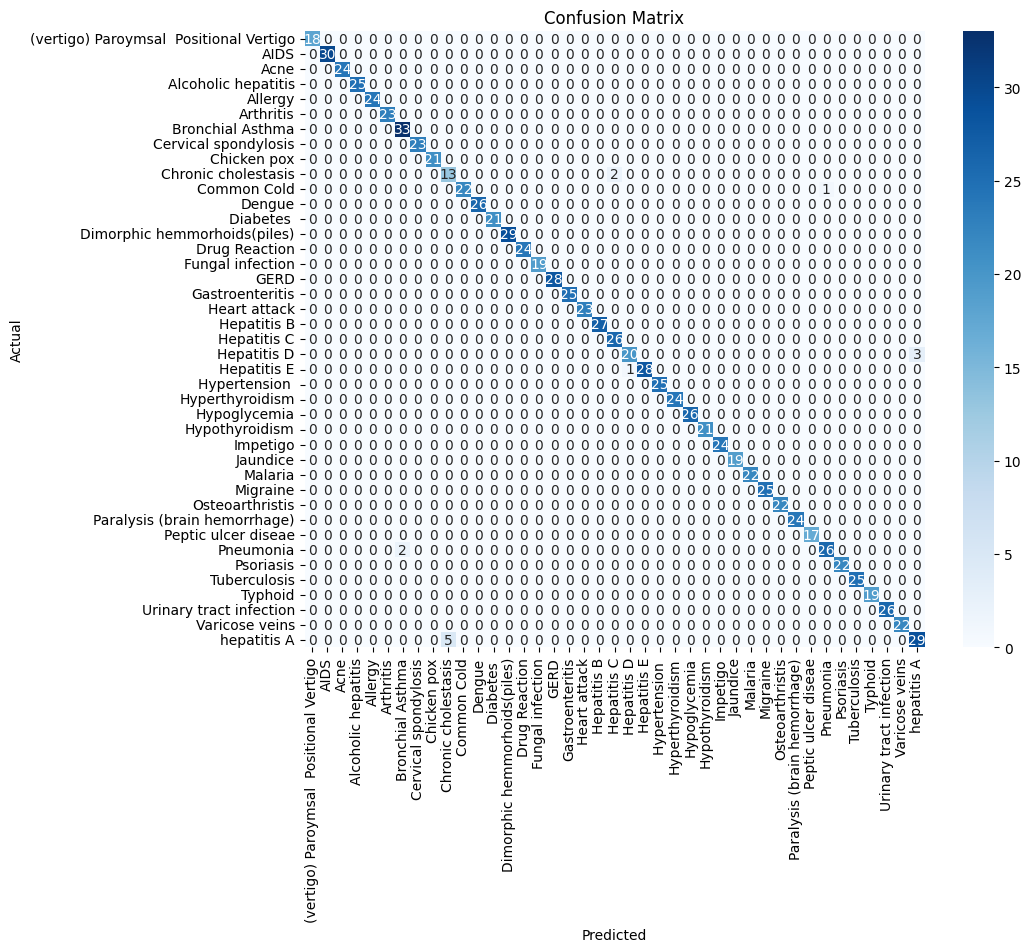

In [12]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [13]:
# Save the model
model_path = '/content/drive/My Drive/medication_management_model.pkl'
joblib.dump(model, model_path)

# Save the vectorizer
vectorizer_path = '/content/drive/My Drive/medication_management_vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_path)

print(f'Model saved to {model_path}')
print(f'Vectorizer saved to {vectorizer_path}')


Model saved to /content/drive/My Drive/medication_management_model.pkl
Vectorizer saved to /content/drive/My Drive/medication_management_vectorizer.pkl
